##Carregando Bibliotecas

Lista de Bibliotecas utilizadas:
 

*   **Pandas** - Permite trabalhar com Dataframe, utilizada para carregar os dados;
*   **Numpy** - Permite trabalhar com algumas operações matemática e com arrays;
*   **Matplotlib** - Permite gerar gráficos;
*   **Sklearn (Scikit-learn)** - Biblioteca que permite trabalhar com alguns algoritmos de aprendizado de máquina além de métricas, tais como acurácia e matriz de confusão;
*   **Keras** - Biblioteca específica para trabalhar com Deep Learning em python, utiliza por trás o Tensorflow;

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import mnist, fashion_mnist, cifar10 #Carrega as Bases de dados direto do Keras
from keras.models import Model #Classe que permite criar o objeto que vai representar a Rede Neural
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Flatten #Classe que permite criar as camadas da rede neural
from keras.optimizers import SGD #Classe que permite trabalhar com o Otmizador alterando seus hiperparâmetros
from keras.utils import to_categorical #Função que permite transformar as saídas de 0, 1, 2 para [0,0,0], [0,1,0], [0,0,1]

from sklearn.metrics import accuracy_score #Funções para calcular a acurácia do modelo

##Carregando os Dados

Os dados são carregados diretamente do Keras, pela função **load_data** nas variáveis  **X_train**, tendo **y_train** como saídas, e **X_test**, tendo **y_test** como saídas.

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255
X_test = X_test / 255
X_train.shape

(60000, 28, 28)

##Criação da Rede Autoencoder

In [ ]:
camada_entrada = Input((784,))

Z = Dense(units=32, activation='relu')(camada_entrada)

camada_saida = Dense(units=784, activation='sigmoid')(Z)

autoencoder = Model(camada_entrada, camada_saida)
autoencoder.compile(loss='mse', optimizer=SGD(learning_rate=0.1, momentum=0.9))
autoencoder.summary()

relatorio = autoencoder.fit(X_train.reshape((60000,784)),X_train.reshape((60000,784)), batch_size=512, 
                            shuffle=True,
                            epochs=30)


Model: "functional_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_11 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
118/118 [==============================] - 0s 3ms/step - loss: 0.2123
Epoch 2/30
118/118 [==============================] - 0s 3ms/step - loss: 0.0855
Epoch 3/30
118/118 [==============================] - 0s 3ms/step - loss: 0.0716
Epoch 4/30
118/118 [==============================] - 0s 3ms/step - loss: 0.0703
Epoch 5/30
118/118 [==============================] - 0

###Visualização do Resultado

Visualização do resultado do autoencoder, onde a primeira linha mostra 10 imagens originais, a linha do meio mostra o resultado da redução de dimensionalidade das imagens originais e na terceira linha mostra a reconstrução da imagem original realizada pelo Autoencoder.

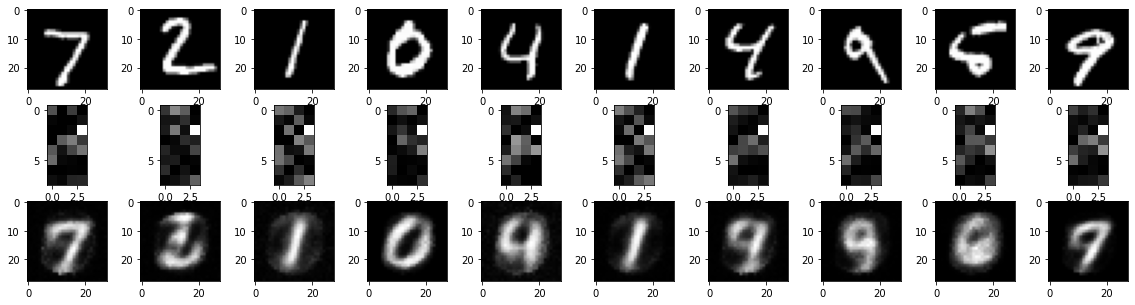

In [ ]:
encoder = Model(camada_entrada, Z)
X_carac = encoder.predict(X_test.reshape((10000,784)))
X_rec = autoencoder.predict(X_test.reshape((10000,784)))

plt.rcParams['figure.figsize'] = (20,5)
fig, ax = plt.subplots(3,10)
plt.gray()
for i in np.arange(10):
    ax[0,i].imshow(X_test[i,:])
    ax[1,i].imshow(X_carac[i,:].reshape(8,4))
    ax[2,i].imshow(X_rec[i,:].reshape(28,28))